In [1]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/home/nuru/.local/share/virtualenvs/deepLearn-tC2glvHT/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
#Start
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
img_rows = 64
img_cols = 64
epochs = 25
batch_size = 50
num_of_train_samples = 600
num_of_test_samples = 300
num_of_validation_samples = 300

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
#Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [24]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size, shuffle=False)
#class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size, shuffle=False)
#class_mode='categorical')

Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [25]:
# Build model
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [26]:
from keras.optimizers import Adam

model.compile(Adam (lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
#from keras.callbacks import EarlyStopping

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')

In [28]:
#Train
history = model.fit_generator(train_generator,
steps_per_epoch=num_of_train_samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=num_of_test_samples // batch_size)

Epoch 1/25
12/12 [==============================] - 20s 2s/step - loss: 0.6681 - acc: 0.5033 - val_loss: 0.6633 - val_acc: 0.5000
Epoch 2/25
12/12 [==============================] - 18s 2s/step - loss: 0.6484 - acc: 0.5000 - val_loss: 0.6569 - val_acc: 0.5000
Epoch 3/25
12/12 [==============================] - 33s 3s/step - loss: 0.6190 - acc: 0.5000 - val_loss: 0.6321 - val_acc: 0.5000
Epoch 4/25
12/12 [==============================] - 32s 3s/step - loss: 0.5733 - acc: 0.5433 - val_loss: 0.5751 - val_acc: 0.5033
Epoch 5/25
12/12 [==============================] - 19s 2s/step - loss: 0.5004 - acc: 0.7567 - val_loss: 0.4846 - val_acc: 0.6333
Epoch 6/25
12/12 [==============================] - 20s 2s/step - loss: 0.4100 - acc: 0.9050 - val_loss: 0.4752 - val_acc: 0.6600
Epoch 7/25
12/12 [==============================] - 20s 2s/step - loss: 0.3191 - acc: 0.9167 - val_loss: 0.4025 - val_acc: 0.7633
Epoch 8/25
12/12 [==============================] - 20s 2s/step - loss: 0.2487 - acc: 0.91

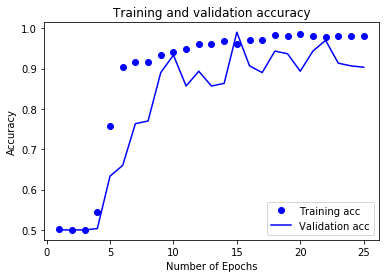

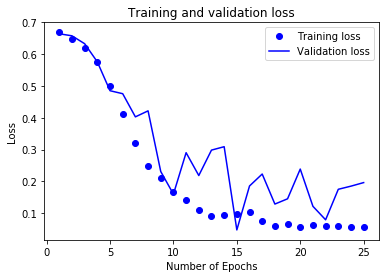

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')

plt.show()

In [30]:
test_labels = test_generator.classes

In [31]:
predictions = model.predict_generator(test_generator, steps=6, verbose=0)

In [32]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    '''This fnctn prints and plots cm, normalization can be applied by setting 'normalize=True'. ''' 
    plt.imshow (cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix Without Normalization')
    print(cm)
    
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment="center", color="white" if cm [i,j]>thresh else "black")
    
    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion Matrix Without Normalization
[[150   0]
 [ 73  77]]


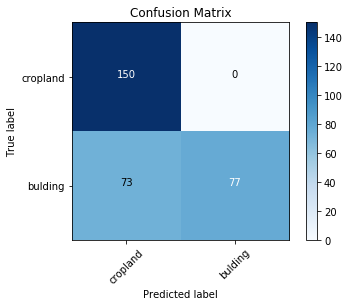

In [35]:
cm_plot_labels = ['cropland', 'bulding']
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

In [36]:
from sklearn.metrics import classification_report

In [37]:
target_names = ['building', 'cropland']
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=target_names))

                  precision    recall  f1-score   support

        building       0.67      1.00      0.80       150
        cropland       1.00      0.51      0.68       150

     avg / total       0.84      0.76      0.74       300



/home/nuru/.local/share/virtualenvs/deepLearn-tC2glvHT/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))


In [38]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=9)
print('test acc:', test_acc)

test acc: 0.8377777751949098
